In [1]:
from ddks.data import *
from ddks.data.openimages_dataset import LS
from ddks import methods
import numpy as np
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import pandas as pd
import pickle
import time
import os
import matplotlib.pyplot as plt
plt.style.use('ah')
plt.show()


Bad key "mathtext.fallback" on line 27 in
/home/hage581/.config/matplotlib/stylelib/belle2_serif.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key "mathtext.fallback" on line 36 in
/home/hage581/.config/matplotlib/stylelib/belle2.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
methods_list = [methods.ddks_method,  methods.vdks_method, methods.rdks_method, methods.onedks_method,
                methods.hotelling_method, methods.kldiv_method]
datasets = [MM]#, MM]
sample_sizes = np.geomspace(2, 20000, 10).astype(int)
trials = 25

def time_method(_method, Dataset, dimension, parameter, sample_size=100, permutations=100):
    if Dataset.name == 'GVM':
        kwargs = dict(mean_p=0.5+parameter, mean_t=0.5)
    elif Dataset.name == 'GVS':
        kwargs = dict(std_p=0.5+parameter, std_t=0.5)
    elif Dataset.name == 'Skew':
        kwargs = dict(lambda_p=0.5+parameter, lambda_t=0.5)
    elif Dataset.name == 'MM':
        kwargs = dict(noise_fraction=parameter)
        
    _dataset = Dataset(dimension=dimension, sample_size=sample_size, **kwargs)
    p, t = next(_dataset)
    try:
        p = p.cuda()
        t = t.cuda()
        start = time.time()
        d = _method.score_function(p, t)
        end = time.time()
        return end - start
    except:
        return np.nan

if os.path.isfile('times_gpu.pkl'):
    times_gpu = pickle.load(open('times_gpu.pkl', 'rb'))
else:
    times_gpu = np.empty((len(methods_list), len(datasets), len(sample_sizes), trials))
    for i, method in enumerate(methods_list):
        print(method.name)
        for j, dataset in enumerate(datasets):
            for k, sample_size in enumerate(tqdm.tqdm(sample_sizes)):
                for l in range(trials):
                    times_gpu[i, j, k, l] = time_method(method, dataset, dimension=3, parameter=0.0, sample_size=sample_size)

    pickle.dump(times_gpu, open('times_gpu.pkl', 'wb'))

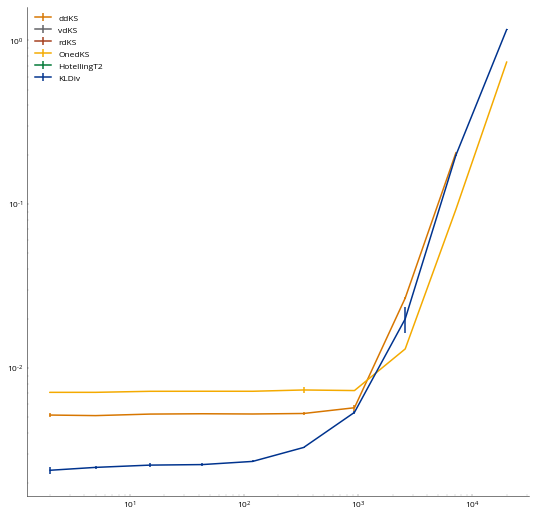

In [3]:
plt.figure(figsize=(9,9))

for i, method in enumerate(methods_list):
    for j, dataset in enumerate(datasets):
        mean_times = np.mean(times_gpu[i, j, ...], axis=1)
        std_times = np.std(times_gpu[i, j, ...], axis=1)
        plt.errorbar(sample_sizes, mean_times, yerr=std_times, label=method.name)
plt.loglog()
plt.legend()
plt.show()

In [4]:
def time_method(_method, Dataset, dimension, parameter, sample_size=100, permutations=100):
    if Dataset.name == 'GVM':
        kwargs = dict(mean_p=0.5+parameter, mean_t=0.5)
    elif Dataset.name == 'GVS':
        kwargs = dict(std_p=0.5+parameter, std_t=0.5)
    elif Dataset.name == 'Skew':
        kwargs = dict(lambda_p=0.5+parameter, lambda_t=0.5)
    elif Dataset.name == 'MM':
        kwargs = dict(noise_fraction=parameter)
        
    _dataset = Dataset(dimension=dimension, sample_size=sample_size, **kwargs)
    p, t = next(_dataset)
    start = time.time()
    d = _method.score_function(p, t)
    end = time.time()
    return end - start

if os.path.isfile('times.pkl'):
    times = pickle.load(open('times.pkl', 'rb'))
else:
    times = np.empty((len(methods_list), len(datasets), len(sample_sizes), trials))
    for i, method in enumerate(methods_list):
        print(method.name)
        for j, dataset in enumerate(datasets):
            for k, sample_size in enumerate(tqdm.tqdm(sample_sizes)):
                for l in range(trials):
                    times[i, j, k, l] = time_method(method, dataset, dimension=3, parameter=0.0, sample_size=sample_size)

    pickle.dump(times, open('times.pkl', 'wb'))

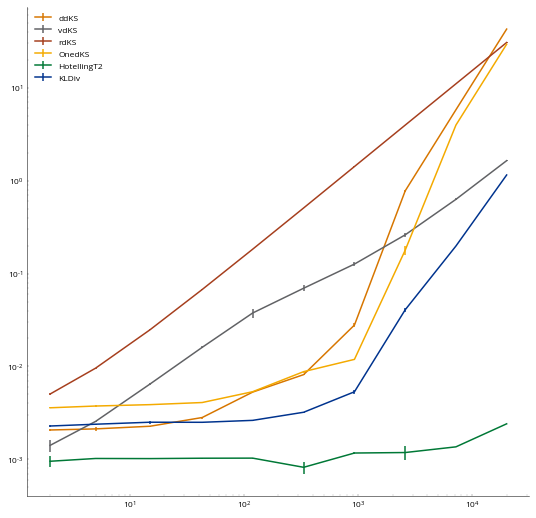

In [5]:
plt.figure(figsize=(9,9))

for i, method in enumerate(methods_list):
    for j, dataset in enumerate(datasets):
        mean_times = np.mean(times[i, j, ...], axis=1)
        std_times = np.std(times[i, j, ...], axis=1)
        plt.errorbar(sample_sizes, mean_times, yerr=std_times, label=method.name)
plt.loglog()
plt.legend()
plt.show()

In [37]:
times_single = pickle.load(open('times_single.pkl', 'rb'))
print(times_single)

[[[[1.53315067e-02 3.30901146e-03 3.30114365e-03 3.31902504e-03
    3.30376625e-03 3.30615044e-03 3.32641602e-03 3.32689285e-03
    3.27157974e-03 3.58200073e-03]
   [3.31735611e-03 3.31258774e-03 3.32903862e-03 3.32212448e-03
    3.28898430e-03 3.30686569e-03 3.34143639e-03 3.30066681e-03
    3.31377983e-03 3.29661369e-03]
   [3.44228745e-03 3.41439247e-03 3.38816643e-03 3.39484215e-03
    2.57539749e-03 2.57539749e-03 2.57802010e-03 2.52699852e-03
    2.58755684e-03 3.95417213e-03]
   [3.63731384e-03 3.66735458e-03 3.67379189e-03 3.60727310e-03
    3.60774994e-03 3.63492966e-03 3.61132622e-03 3.62968445e-03
    3.62944603e-03 3.59797478e-03]
   [4.71854210e-03 4.51874733e-03 4.55713272e-03 4.60362434e-03
    4.57191467e-03 4.58693504e-03 3.66139412e-03 3.76319885e-03
    3.41916084e-03 3.44491005e-03]
   [9.12742615e-02 4.57150936e-02 1.80010796e-02 3.64255905e-02
    3.54752541e-02 8.89096260e-02 1.55410767e-02 2.94620991e-02
    3.95953655e-02 5.87453842e-02]
   [4.25579548e-02 8.9

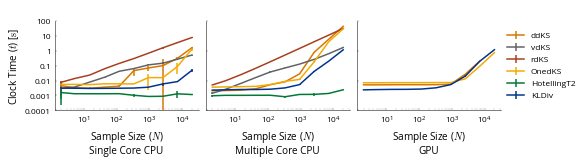

In [46]:
fig = plt.figure(figsize=(8, 8/3/1.618))
#times_single = np.nan * np.ones_like(times)
max_max = np.nanmax([np.nanmax(times_single), np.nanmax(times), np.nanmax(times_gpu)])
min_min = np.nanmin([np.nanmin(times_single), np.nanmin(times), np.nanmin(times_gpu)])
plt.subplot(131)
ax1 = plt.gca()
for i, method in enumerate(methods_list):
    for j, dataset in enumerate(datasets):
        mean_times = np.mean(times_single[i, j, ...], axis=1)
        std_times = np.std(times_single[i, j, ...], axis=1)
        plt.errorbar(sample_sizes, mean_times, yerr=std_times, label=method.name)
plt.loglog()
plt.ylabel(r'Clock Time ($t$) [$\mathrm{s}$]')
plt.xlabel('Sample Size ($N$)' + "\n" + 'Single Core CPU')
plt.subplot(132)
for i, method in enumerate(methods_list):
    for j, dataset in enumerate(datasets):
        mean_times = np.mean(times[i, j, ...], axis=1)
        std_times = np.std(times[i, j, ...], axis=1)
        plt.errorbar(sample_sizes, mean_times, yerr=std_times, label=method.name)
plt.loglog()
plt.xlabel('Sample Size ($N$)' + "\n" + 'Multiple Core CPU')
plt.subplot(133)
for i, method in enumerate(methods_list):
    for j, dataset in enumerate(datasets):
        mean_times = np.mean(times_gpu[i, j, ...], axis=1)
        std_times = np.std(times_gpu[i, j, ...], axis=1)
        plt.errorbar(sample_sizes, mean_times, yerr=std_times, label=method.name)
plt.loglog()
plt.xlabel('Sample Size ($N$)' + "\n" + 'GPU')
handles, labels = plt.gca().get_legend_handles_labels()
fig.subplots_adjust(right=0.90, wspace=0.05)
legend_ax = fig.add_axes([0.92, 0.00, 0.10, 1.0])
plt.sca(legend_ax)
plt.axis('off')
legend = plt.legend(handles, labels, loc='center')
yt = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100]
for i in range(3):
    plt.subplot(131 + i)
    plt.loglog()
    plt.ylim(min(yt), max(yt))
    if i > 0:
        plt.setp(plt.gca().get_yticklabels(), visible=False)
plt.subplot(131)
plt.yticks(yt, ['0.0001', '0.001', '0.01', '0.1',  '1',  '10', '100'])
plt.savefig('clock_time.pdf')
plt.show()